# Module73 PCA Assignment4

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
from google.colab import files

uploaded = files.upload()

Saving redWineData.csv to redWineData.csv


In [5]:
df = pd.read_csv('redWineData.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,Ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# As 'quality' is the target variable
X = df.drop(columns = ['quality'])
Y = df['quality']

In [11]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

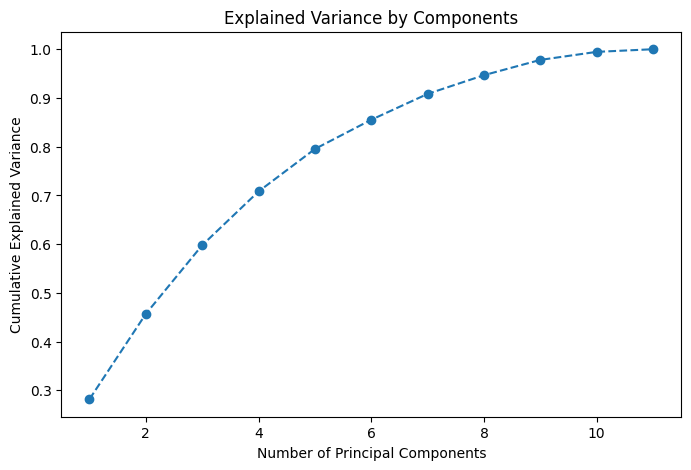

In [14]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.show()

In [15]:
# Select optimal number of components (e.g., 2 for visualization)
pca_opt = PCA(n_components=2)
X_pca_opt = pca_opt.fit_transform(X_scaled)

In [ ]:
# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 1], hue=y, palette="deep")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Wine Dataset")
plt.legend(title="Target")
plt.show()


In [16]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_opt)
y_kmeans = kmeans.labels_

In [17]:
# Silhouette Score
sil_score = silhouette_score(X_pca_opt, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3782


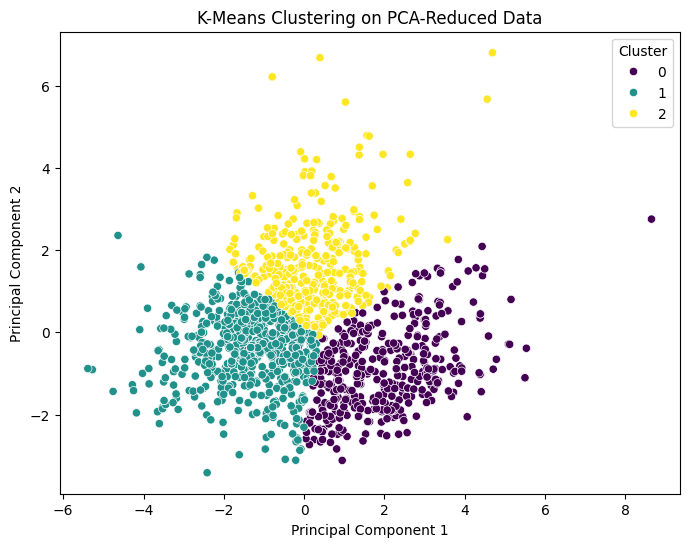

In [18]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 1], hue=y_kmeans, palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.legend(title="Cluster")
plt.show()

## A table showing the performance metrics for the clustering algorithm.

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, homogeneity_score
from sklearn.cluster import KMeans
import pandas as pd

pca_transformed_data = X_pca                    # from above

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(pca_transformed_data)

# Compute Performance Metrics
silhouette = silhouette_score(pca_transformed_data, labels)
inertia = kmeans.inertia_
davies_bouldin = davies_bouldin_score(pca_transformed_data, labels)
adjusted_rand = adjusted_rand_score(Y, labels)  # If true labels are available
homogeneity = homogeneity_score(Y, labels)  # If true labels are available

# Create Performance Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Silhouette Score", "Inertia (WCSS)", "Davies-Bouldin Index", "Adjusted Rand Index", "Homogeneity Score"],
    "Value": [silhouette, inertia, davies_bouldin, adjusted_rand, homogeneity]
})

print(metrics_table)


                 Metric         Value
0      Silhouette Score      0.189204
1        Inertia (WCSS)  12629.974592
2  Davies-Bouldin Index      1.767265
3   Adjusted Rand Index      0.029208
4     Homogeneity Score      0.052192


# Clustering Performance Metrics

1.) **Silhouette Score** – Measures how similar an object is to its own cluster compared to other clusters. Ranges from -1 to 1 (higher is better).

2.) **Inertia (Within-Cluster Sum of Squares - WCSS)** – Measures how tightly the data points are clustered around the centroids (lower is better).

3.) **Davies-Bouldin Index** – Measures the average similarity ratio of each cluster with the most similar one (lower is better).

4.) **Adjusted Rand Index (ARI)** – Measures the similarity between predicted clusters and actual labels (if available, higher is better).

5.) **Homogeneity Score** – Measures if each cluster contains only members of a single class (higher is better).
